# Data Modelling

The training and test data has previously been cleaned and preprocessed in another notebook, 'Data Cleaning and EDA'. In this notebook we will go through the data modelling process. The main steps are:

1. Initial import of data and software libraries.
2. Train-test split and scaling of data
3. Application of LassoCV model for final feature selection
4. Data modelling and evaluation
5. Prediction on Test Data and Kaggle Submission 


In [1]:
#Import basic EDA and Visualisation libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
housing_train = pd.read_csv('datasets/Train_Cleaned.csv')

In [3]:
housing_train.head()

,Id,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,...,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl
0,109,68.0,13517.0,2,2,6,8,289.0,3,2,...,1,0,0,0,0,0,0,0,0,1
1,544,43.0,11492.0,2,2,7,5,132.0,3,2,...,0,0,0,1,0,0,0,0,0,1
2,153,68.0,7922.0,3,2,5,7,0.0,2,3,...,0,0,0,1,0,0,0,0,0,1
3,318,73.0,9802.0,3,2,5,5,0.0,2,2,...,0,0,0,1,0,0,0,0,0,1
4,255,82.0,14235.0,2,2,6,8,0.0,2,2,...,1,0,0,0,0,0,0,0,0,1


In [4]:
housing_train.set_index('Id', inplace = True)

In [5]:
housing_train.shape

(2019, 207)

In [6]:
housing_test = pd.read_csv('datasets/Test_Cleaned.csv')
housing_test.head()

,Id,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,69.0,9142,3,2,6,8,0.0,2,1,...,0,0,0,0,0,0,0,0,0,1
1,2718,69.6,9662,2,2,5,4,0.0,2,2,...,0,0,0,0,0,0,0,0,0,1
2,2414,58.0,17104,2,2,7,5,0.0,3,2,...,0,0,0,0,0,0,1,0,0,0
3,1989,60.0,8520,3,2,5,6,0.0,3,2,...,0,0,0,0,0,0,0,0,0,1
4,625,69.6,9500,2,2,6,5,247.0,2,2,...,0,0,0,0,0,0,0,0,0,1


In [7]:
housing_test.set_index('Id', inplace = True)
housing_test.shape

(879, 201)

In [8]:
test_features = housing_test.columns.to_list()
test_features

['Lot Frontage',
 'Lot Area',
 'Lot Shape',
 'Land Slope',
 'Overall Qual',
 'Overall Cond',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 'Screen Porch',
 'Pool QC',
 'Fence',
 'Garage Age',
 'House Age',
 'House Remod Yrs',
 'Gr * 2nd Flr SF',
 'House Age/Remod',
 'Garage Qual/Cond',
 'Garage Age * Cars',
 'Alley_Grvl',
 'Alley_Pave',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Central Air_N',
 'Central Air_Y',
 'Condition 

In [9]:
train_features = housing_train.columns.to_list()
train_features

['Lot Frontage',
 'Lot Area',
 'Lot Shape',
 'Land Slope',
 'Overall Qual',
 'Overall Cond',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 'Screen Porch',
 'Pool QC',
 'Fence',
 'SalePrice',
 'Garage Age',
 'House Age',
 'House Remod Yrs',
 'Gr * 2nd Flr SF',
 'House Age/Remod',
 'Garage Qual/Cond',
 'Garage Age * Cars',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Cr

In [10]:
len(train_features)

207

In [11]:
len(test_features)

201

We see that we have a different set of features from the preprocessed training and test datasets, despite both datasets going through the same preprocessing steps. This is due to a difference in values when applying one-hot encoding to categorical variables.

We select a set of common features between the preprocessed training and test datasets.

In [12]:
common_features = set(test_features).intersection(set(train_features))
common_features

{'1st Flr SF',
 '2nd Flr SF',
 'Alley_Grvl',
 'Alley_Pave',
 'Bedroom AbvGr',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin Type 1',
 'Central Air_N',
 'Central Air_Y',
 'Condition 1_Artery',
 'Condition 1_Feedr',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 1_RRAe',
 'Condition 1_RRAn',
 'Condition 1_RRNe',
 'Condition 1_RRNn',
 'Electrical',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st_AsbShng',
 'Exterior 1st_AsphShn',
 'Exterior 1st_BrkComm',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 1st_HdBoard',
 'Exterior 1st_MetalSd',
 'Exterior 1st_Plywood',
 'Exterior 1st_Stucco',
 'Exterior 1st_VinylSd',
 'Exterior 1st_Wd Sdng',
 'Exterior 1st_WdShing',
 'Exterior 2nd_AsbShng',
 'Exterior 2nd_AsphShn',
 'Exterior 2nd_Brk Cmn',
 'Exterior 2nd_BrkFace',
 'Exterior 2

In [13]:
len(common_features)

195

In [14]:
common_features = list(common_features)

In [15]:
X = housing_train[common_features]   #feature set
X.shape

(2019, 195)

In [16]:
y = housing_train['SalePrice']  #target variable
y.shape

(2019,)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42)

In [18]:
X_train.shape

(1514, 195)

In [19]:
X_val.shape

(505, 195)

In [20]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)   #scaling of feature dataset before fitting the linear regression models
X_val_scaled = ss.transform(X_val)

In [21]:
X_train_scaled.shape

(1514, 195)

In [22]:
lasso = LassoCV(n_alphas = 500)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=500)

In [23]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 3)
lasso_cv_scores.mean()

0.9065568140971866

A few runs were carried out, with different numbers of Cross Validation folds, and different n_alphas. We stopped once we reached the best Cross Validation score.

In [24]:
len(lasso.coef_)

195

In [25]:
lasso_coef = pd.Series(lasso.coef_, index = X.columns).sort_values(ascending = False).to_frame(name = 'Coef')

In [26]:
lasso_coef[lasso_coef['Coef'] != 0]   

,Coef
Gr Liv Area,15977.143740
Overall Qual,11375.216542
Total Bsmt SF,8756.170340
BsmtFin SF 1,8643.835651
Gr * 2nd Flr SF,6649.451064
...,...
Bsmt Cond,-2114.511188
Roof Style_Mansard,-2386.959796
Mas Vnr Type_BrkFace,-2622.287293
House Age/Remod,-3304.440763


We have used the LassoCV model to extract the most significant features.

In [27]:
lasso_coef.tail(20)

,Coef
Neighborhood_NWAmes,-797.656490
Neighborhood_CollgCr,-805.788797
MS SubClass_120,-808.265793
Neighborhood_Edwards,-835.881880
Bldg Type_Twnhs,-838.684169
Garage Type_2Types,-848.632716
Condition 1_RRNn,-871.590220
Mas Vnr Type_BrkCmn,-887.802576
MS Zoning_C (all),-923.304102
Neighborhood_OldTown,-1060.068409


In [28]:
lasso_coef.head(25)

,Coef
Gr Liv Area,15977.143740
Overall Qual,11375.216542
Total Bsmt SF,8756.170340
BsmtFin SF 1,8643.835651
Gr * 2nd Flr SF,6649.451064
Exter Qual,6141.019791
1st Flr SF,6105.714715
Neighborhood_NridgHt,6080.021733
Overall Cond,5534.462635
Neighborhood_StoneBr,5358.015960


In [29]:
coef_cond = ((lasso_coef['Coef'] > 1500) | (lasso_coef['Coef'] < (-1500)))

In [30]:
significant_coefs = lasso_coef[coef_cond]
significant_coefs

,Coef
Gr Liv Area,15977.143740
Overall Qual,11375.216542
Total Bsmt SF,8756.170340
BsmtFin SF 1,8643.835651
Gr * 2nd Flr SF,6649.451064
Exter Qual,6141.019791
1st Flr SF,6105.714715
Neighborhood_NridgHt,6080.021733
Overall Cond,5534.462635
Neighborhood_StoneBr,5358.015960


We selected the best number of features to get the best predictions. After a few trials, these number of features seem to work best in reducing the Root Mean Squared error, and givng the best R2 score.

In [31]:
significant_features = lasso_coef[coef_cond].index.to_list()
significant_features

['Gr Liv Area',
 'Overall Qual',
 'Total Bsmt SF',
 'BsmtFin SF 1',
 'Gr * 2nd Flr SF',
 'Exter Qual',
 '1st Flr SF',
 'Neighborhood_NridgHt',
 'Overall Cond',
 'Neighborhood_StoneBr',
 'Garage Age * Cars',
 'Bldg Type_1Fam',
 'Mas Vnr Area',
 'Sale Type_New',
 'Lot Area',
 'Kitchen Qual',
 'Bsmt Exposure',
 'Screen Porch',
 'Functional',
 'Exterior 1st_BrkFace',
 'Land Contour_HLS',
 'Roof Style_Hip',
 'Garage Area',
 'Fireplaces',
 'Neighborhood_NoRidge',
 'Neighborhood_Crawfor',
 'MS Zoning_FV',
 'Condition 1_PosN',
 'Condition 1_Norm',
 'Bsmt Full Bath',
 'Garage Type_Attchd',
 'Bedroom AbvGr',
 'Bsmt Cond',
 'Roof Style_Mansard',
 'Mas Vnr Type_BrkFace',
 'House Age/Remod',
 'House Age']

In [32]:
len(significant_features)

37

We now apply linear regression again to predict the prices based on the test dataset, but only using the 'Significant Features' we have extracted earlier.

In [33]:
X_filtered = X[significant_features]

In [34]:
X_filtered.head()

,Gr Liv Area,Overall Qual,Total Bsmt SF,BsmtFin SF 1,Gr * 2nd Flr SF,Exter Qual,1st Flr SF,Neighborhood_NridgHt,Overall Cond,Neighborhood_StoneBr,...,Condition 1_PosN,Condition 1_Norm,Bsmt Full Bath,Garage Type_Attchd,Bedroom AbvGr,Bsmt Cond,Roof Style_Mansard,Mas Vnr Type_BrkFace,House Age/Remod,House Age
Id,,,,,,,,,,,,,,,,,,,,,
109,1479.0,6,725.0,533.0,1115166.0,3,725.0,0,8,0,...,0,0,0,1,3,3,0,1,59,44
544,2122.0,7,913.0,637.0,2565498.0,3,913.0,0,5,0,...,0,1,1,1,4,3,0,1,47,24
153,1057.0,5,1057.0,731.0,0.0,2,1057.0,0,7,0,...,0,1,1,0,3,3,0,0,80,67
318,1444.0,5,384.0,0.0,1010800.0,2,744.0,0,5,0,...,0,1,0,0,3,3,0,0,27,14
255,1445.0,6,676.0,0.0,887230.0,2,831.0,0,8,0,...,0,1,0,0,3,4,0,0,147,120


In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, random_state = 42)

In [36]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

In [37]:
X_train_scaled.shape

(1514, 37)

In [38]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv = 3)
lr_cv_scores.mean()

0.9111004041746341

In [40]:
lr_preds = lr.predict(X_val_scaled)
lr.score(X_val_scaled, y_val)

0.9151562668948621

In [41]:
np.sqrt(mean_squared_error(lr_preds, y_val))

24042.848279138656

In [42]:
ridge = RidgeCV(alphas = np.logspace(0, 3, 3000))
ridge.fit(X_train_scaled, y_train)
ridge.alpha_

51.94836188653292

In [43]:
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv = 3)
ridge_cv_scores.mean()

0.911615266880767

In [44]:
ridge_preds = ridge.predict(X_val_scaled)
ridge.score(X_val_scaled, y_val)

0.9152177421330002

In [45]:
np.sqrt(mean_squared_error(ridge_preds, y_val))

24034.136335413947

In [46]:
lasso = LassoCV(n_alphas = 500)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=500)

In [47]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 3)
lasso_cv_scores.mean()

0.9109846962090417

In [48]:
lasso_preds = lasso.predict(X_val_scaled)
lasso.score(X_val_scaled, y_val)

0.9152121358216156

In [49]:
np.sqrt(mean_squared_error(lasso_preds, y_val))

24034.93096289922

**Evaluation**:

The Ridge Model seems to be giving the best predictions, based on the RMSE and the R2 score.   

In [50]:
residuals = ridge_preds - y_val

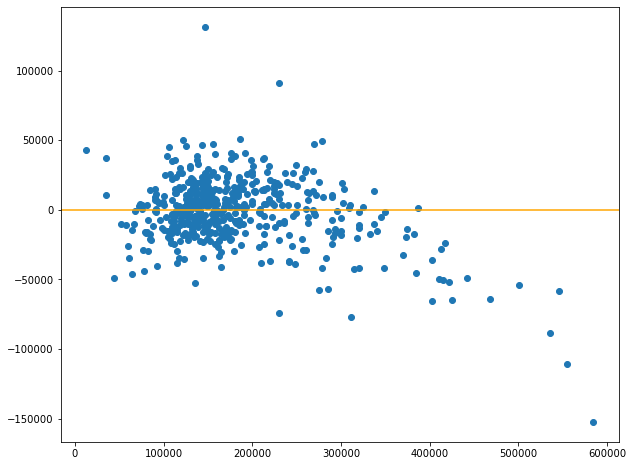

In [51]:
plt.figure(figsize = (10, 8))
plt.scatter(y_val, residuals)
plt.axhline(0, color = 'orange')


In [52]:
len(residuals)

505

### Generating Test Predictions  

Since the Ridge model that we have trained seems to produce the best results, we apply the model to the test data.

In [53]:
X_test = housing_test[significant_features]
X_test.head()

,Gr Liv Area,Overall Qual,Total Bsmt SF,BsmtFin SF 1,Gr * 2nd Flr SF,Exter Qual,1st Flr SF,Neighborhood_NridgHt,Overall Cond,Neighborhood_StoneBr,...,Condition 1_PosN,Condition 1_Norm,Bsmt Full Bath,Garage Type_Attchd,Bedroom AbvGr,Bsmt Cond,Roof Style_Mansard,Mas Vnr Type_BrkFace,House Age/Remod,House Age
Id,,,,,,,,,,,,,,,,,,,,,
2658,1928,6,1020,0,1966560.0,2,908,0,8,0,...,0,1,0,0,4,3,0,0,180,110
2718,1967,5,1967,0,0.0,2,1967,0,4,0,...,0,1,0,1,6,3,0,0,86,43
2414,1496,7,654,554,1244672.0,3,664,0,5,0,...,0,1,1,1,3,4,0,0,28,14
1989,968,5,968,0,0.0,3,968,0,6,0,...,0,1,0,0,2,3,0,0,111,97
625,1394,6,1394,609,0.0,2,1394,0,5,0,...,0,1,1,1,3,3,0,1,114,57


In [54]:
X_test.shape

(879, 37)

In [55]:
X_test_scaled = ss.fit_transform(X_test)
X_test_scaled.shape

(879, 37)

In [56]:
predictions = ridge.predict(X_test_scaled)
predictions

array([133763.81440302, 153403.50402928, 216765.81877589, 120435.17051232,
       178839.4901525 ,  81879.65432407, 112467.68999039, 151764.98479852,
       187329.24481641, 174657.60224591, 157077.06510177, 134620.95428949,
       151574.13079427, 262502.98689395, 160391.27693131, 104762.11498252,
       136603.53809595, 124296.26494494, 182725.33412424, 182609.27047768,
       150990.61361854, 123012.66836829, 190496.20456945, 172037.44243304,
       193107.11712811, 137646.37808089, 118446.35179908, 135816.02803888,
       154890.86761518,  43478.12727592, 110868.33025119,  96372.63546568,
       214624.86641393, 166358.42292501, 217371.96364263, 184465.49456033,
       136587.02513128,  62980.42652292, 121059.97319976, 202615.96328798,
       187382.97956066, 203357.34683263, 157407.47079195, 190793.73030971,
       219392.85219223,  95233.11302004, 217504.47258384, 121301.99164593,
       131636.6501296 , 119520.41675532, 114002.1761311 , 228961.99671878,
       243987.41721624, 1

In [57]:
X_test['SalePrice'] = predictions
X_test.head()

/Users/ahmadzainichia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Gr Liv Area,Overall Qual,Total Bsmt SF,BsmtFin SF 1,Gr * 2nd Flr SF,Exter Qual,1st Flr SF,Neighborhood_NridgHt,Overall Cond,Neighborhood_StoneBr,...,Condition 1_Norm,Bsmt Full Bath,Garage Type_Attchd,Bedroom AbvGr,Bsmt Cond,Roof Style_Mansard,Mas Vnr Type_BrkFace,House Age/Remod,House Age,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,1928,6,1020,0,1966560.0,2,908,0,8,0,...,1,0,0,4,3,0,0,180,110,133763.814403
2718,1967,5,1967,0,0.0,2,1967,0,4,0,...,1,0,1,6,3,0,0,86,43,153403.504029
2414,1496,7,654,554,1244672.0,3,664,0,5,0,...,1,1,1,3,4,0,0,28,14,216765.818776
1989,968,5,968,0,0.0,3,968,0,6,0,...,1,0,0,2,3,0,0,111,97,120435.170512
625,1394,6,1394,609,0.0,2,1394,0,5,0,...,1,1,1,3,3,0,1,114,57,178839.490152


In [58]:
submission = X_test[['SalePrice']]
submission.head()

,SalePrice
Id,
2658,133763.814403
2718,153403.504029
2414,216765.818776
1989,120435.170512
625,178839.490152


In [59]:
submission.sort_index(inplace = True)
submission.head()

/Users/ahmadzainichia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SalePrice
Id,
2,118457.146170
4,284215.453885
6,179907.078084
7,247623.913377
17,214671.698667


In [60]:
submission.shape

(879, 1)

In [61]:
submission.to_csv('datasets/Projected Prices.csv')

### Kaggle Score   

We have submitted a baseline prediction to Kaggle earlier. The baseline model was based on the same data cleaning and modelling steps, but without any feature engineering or selection. The difference in the scores can be seen below:

![Kaggle Score Screenshot](Images/Kaggle-Score.png "Kaggle")

## Conclusions and Recommendations

In [62]:
significant_coefs

,Coef
Gr Liv Area,15977.143740
Overall Qual,11375.216542
Total Bsmt SF,8756.170340
BsmtFin SF 1,8643.835651
Gr * 2nd Flr SF,6649.451064
Exter Qual,6141.019791
1st Flr SF,6105.714715
Neighborhood_NridgHt,6080.021733
Overall Cond,5534.462635
Neighborhood_StoneBr,5358.015960


### Top 10 Qualities

From our modelling process, we have found that the **features which will be the best predictors for a higher sale price are**:

1. Living area above ground (including 1st and 2nd floor area)
2. Overall material and finish of the house, as well as overall condition and functionality
3. Basement area, how much of it is finished properly, and exposure
4. Contour of land and lot area
5. Age of Garage and how many cars it can fit
6. Exterior quality, Masonry veneer area
7. Kitchen quality
8. Number of full baths in Basement
9. Screen Porch area
10. Number of fireplaces


These might seem straightforward, but the data does show the importance of these features. Depending on whether you are a buyer or seller, these are the top significant features to look out for.

### Neighborhoods

It is well known that houses in certain locations will be able to command higher sale prices. While some aras are fairly obvious to predict, for most other locations it can be quite difficult as this is a subjective feature and different people may have different ideas. However, our data shows clearly that the neighborhoods that are preferred by buyers are:

1. Northridge Heights
2. Stone Brook
3. Northridge
4. Crawford


There are a few neighborhoods which buyers seem to less keen on, namely:

1. North Ames
2. Old Town
3. Edwards
4. College Creek

### Applications and Recommendations

Firstly, our analysis can be applied to predict the price of a house that is just going on sale. This is extremely useful to both buyers and sellers, so that they have a benchmark of how much a certain property should cost, given the features it has. This can help to prevent over or under selling, and can help both prospective owners and sellers reach their goals more effectively.

Secondly, our analysis also shows which features of a property will potentially increase the sale price of a house, as well as what features may hurt the prospects of a house sale. This information is **extremely valuable to prospective sellers**, as they will then be able to carry out **targeted improvements** to their home before trying to sell it.